# Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

Good Luck !!!








In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [2]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [3]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [ ]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

**Don't forget to write the question number when answering**

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. What is the correlation between discount and sale?


# Data Preprocessing

In [4]:
# data  overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
# checking for missing value
data.isnull().sum()
# this clearly shows that there's only missing value in the postal code column
# because there is a high percentage of missing value in that coloumn
# The best option is to drop the column from the dataset.

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
# checking the categories in the categorical variable

In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [8]:
data['City'].unique()

array(['Constantine', 'Wagga Wagga', 'Budapest', ..., 'Missoula',
       'Lannion', 'Deer Park'], dtype=object)

In [9]:
data['Country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

In [10]:
data['State'].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Medea',
       'Jizzakh', 'Inhambane'], dtype=object)

In [11]:
data['Region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [12]:
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [13]:
data['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [14]:
data['Product Name'].unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Park Ridge Embossed Executive Business Envelopes',
       'Acco Glide Clips', 'Multimedia Mailers'], dtype=object)

In [15]:
# checking the descriptive summary of the numerical data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [16]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
# dropping some irrelevant columns from the dataset especially the postal code.
df=data.drop(columns=['Row ID', 'Order ID','Customer ID','Customer Name','Postal Code', 'Product ID'])
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


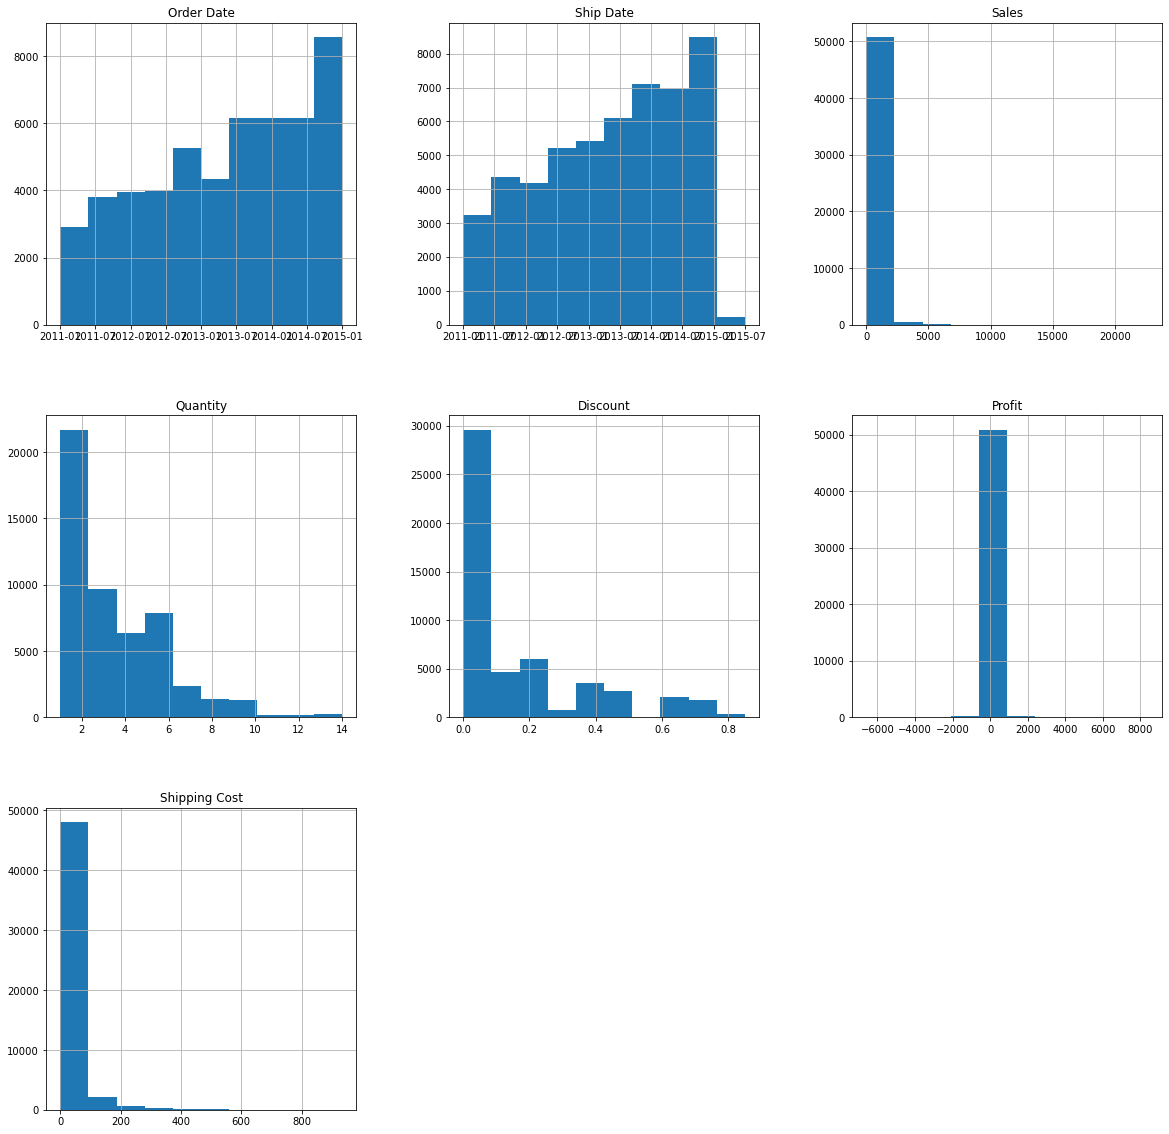

In [6]:
# checking the distribution of variables
df.hist()
#plt.figure(figsize=(20,8))
plt.gcf().set_size_inches(20,20)
plt.show()

# Data Analysis and Visualization

# Univariant Analysis

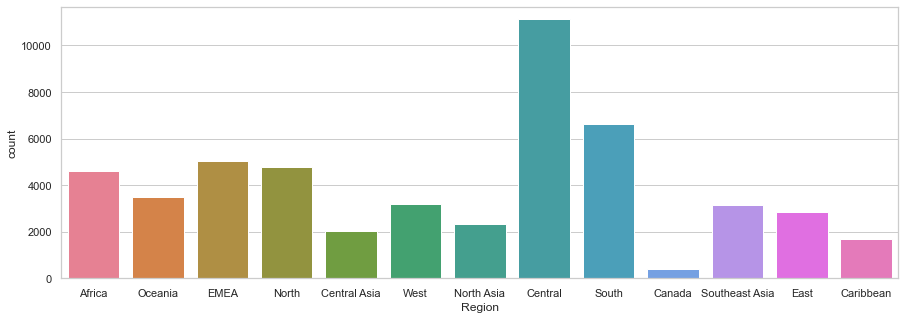

In [197]:
# Region
plt.figure(figsize=(15,5))
ax=sns.countplot(x=df.Region,data=df, palette='husl')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

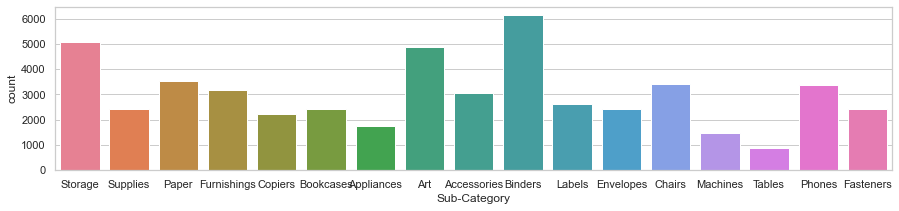

In [196]:
# Sub-Category
plt.figure(figsize=(15,3))
#plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df, palette='husl')


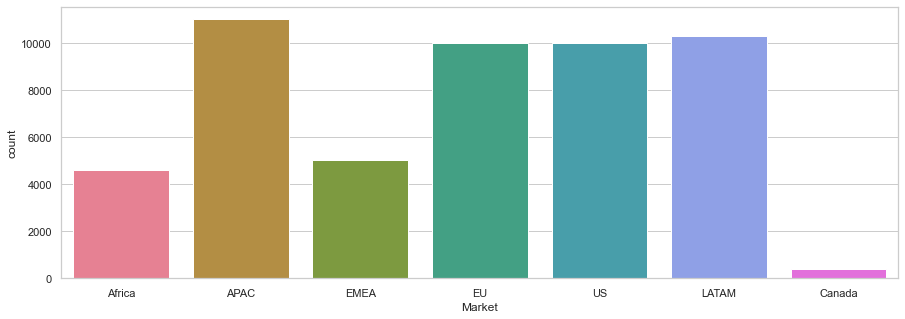

In [198]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x=df.Market,data=df, palette='husl')

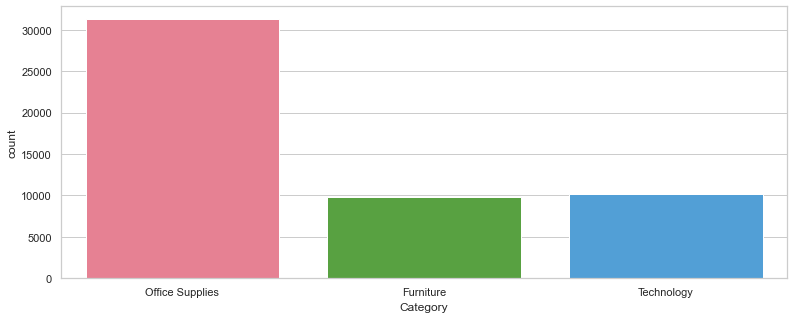

In [202]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x=df.Category,data=df, palette='husl')

# Bi- Variant Analysis

<AxesSubplot:xlabel='Market', ylabel='Sales'>

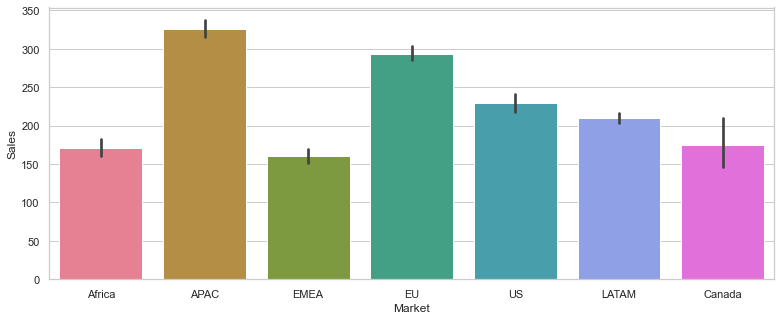

In [239]:
# General Analysis of Sales made based on market domain
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Sales',palette='husl',data=df)

<AxesSubplot:xlabel='Market', ylabel='Profit'>

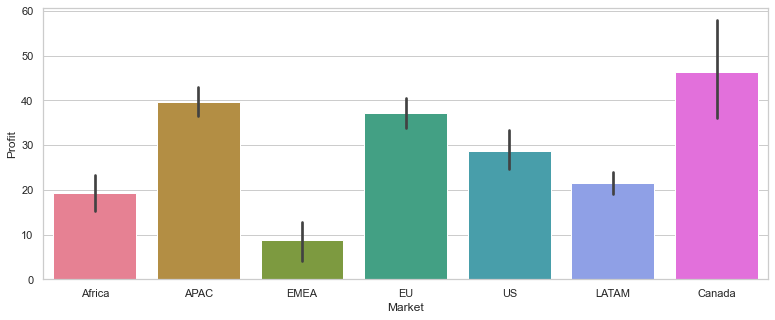

In [240]:
# General Analysis of Profit made based on market domain
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Profit',palette='husl',data=df)

Text(0.5, 0, 'Category')

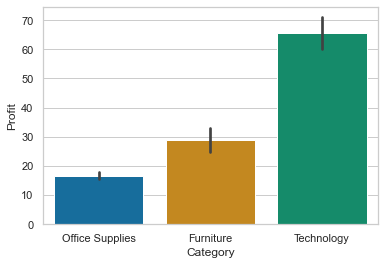

In [131]:
# Plotting Category aganist Profit
sns.barplot(x='Category',y='Profit',palette='colorblind',data=df)
plt.xlabel('Category')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

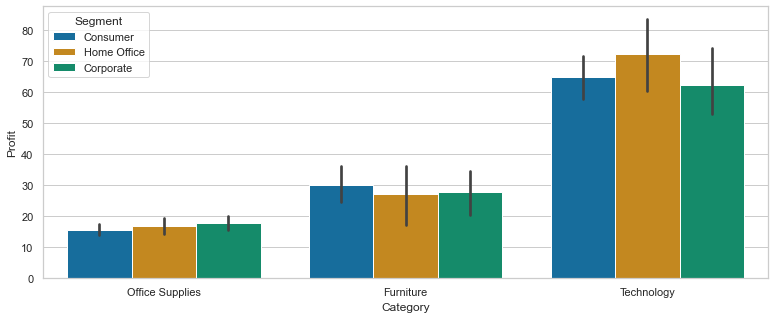

In [214]:
plt.figure(figsize=(13,5))
sns.barplot(x='Category',y='Profit',hue='Segment',palette='colorblind',data=df)

<AxesSubplot:xlabel='Market', ylabel='Profit'>

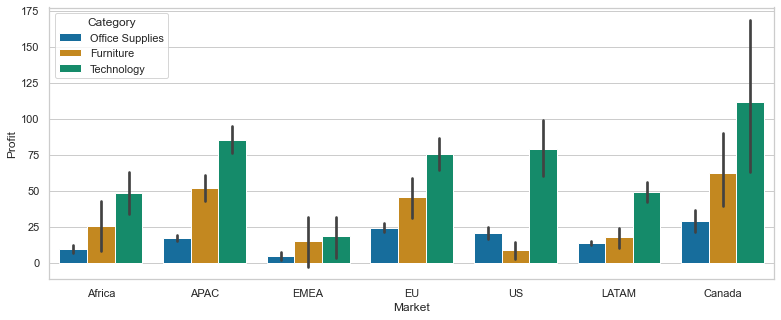

In [210]:
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Profit',hue='Category',palette='colorblind',data=df)

<AxesSubplot:xlabel='Market', ylabel='Discount'>

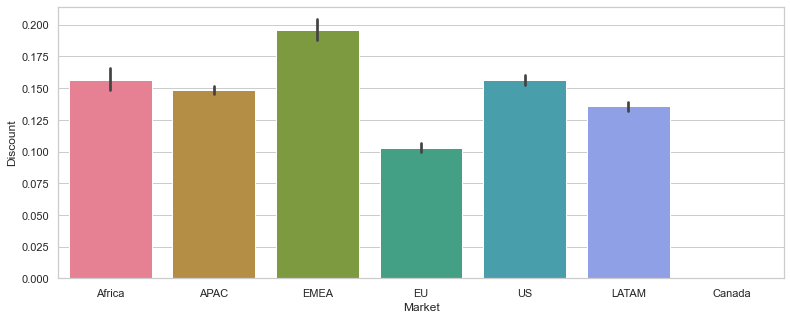

In [212]:
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Discount',palette='husl',data=df)

<AxesSubplot:xlabel='Market', ylabel='Discount'>

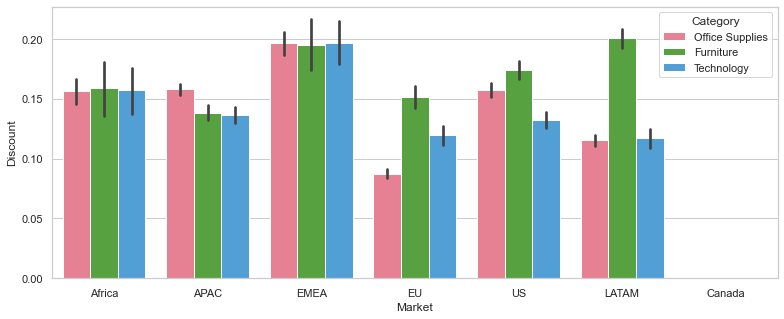

In [213]:
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Discount',hue='Category',palette='husl',data=df)

<AxesSubplot:xlabel='Market', ylabel='Shipping Cost'>

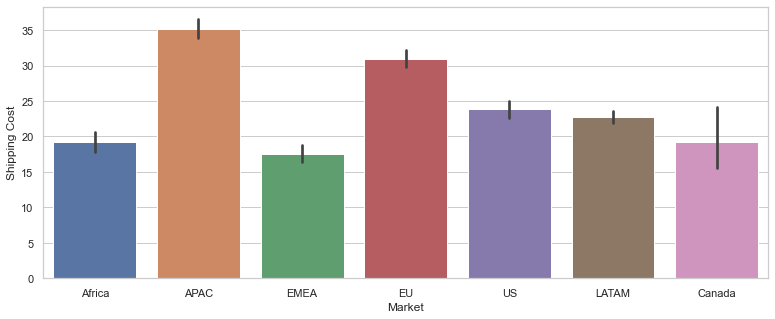

In [218]:
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Shipping Cost',data=df)

<AxesSubplot:xlabel='Market', ylabel='Shipping Cost'>

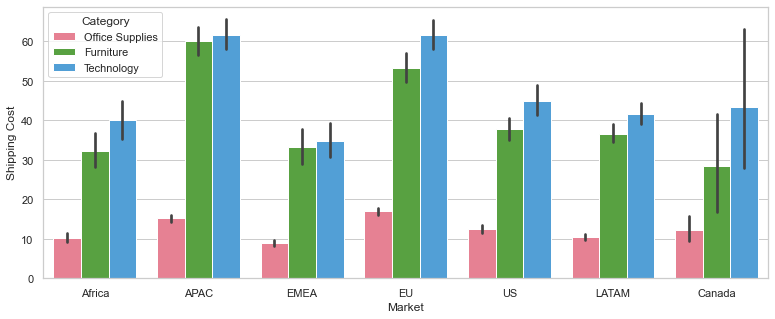

In [222]:
plt.figure(figsize=(13,5))
sns.barplot(x='Market',y='Shipping Cost',hue='Category',palette='husl',data=df)

In [148]:
# Analaysing Sales percentage based on region using pie charges
top_region= df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(10)
top_region.reset_index()

,Region,Sales
0,Central,2.822303e+06
1,South,1.600907e+06
2,North,1.248166e+06
3,Oceania,1.100185e+06
4,Southeast Asia,8.844232e+05
5,North Asia,8.483098e+05
6,EMEA,8.061613e+05
7,Africa,7.837732e+05
8,Central Asia,7.528266e+05
9,West,7.254578e+05


<AxesSubplot:ylabel='Sales'>

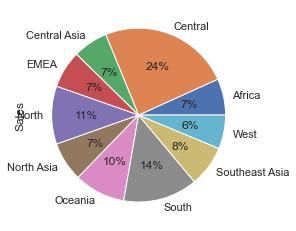

In [172]:
r='autocpt'
plt.plot(e=r, kind='pie')
explode=(0.05, 0.05, 0.05)
top_region.groupby(['Region']).sum().plot(kind='pie', y='Sales',autopct='%1.0f%%')

In [248]:
# Analaysing Sales percentage based on region using pie charges
top_region= df.groupby('Market')['Sales'].sum().sort_values(ascending=False).head(10)
top_region.reset_index()

,Market,Sales
0,APAC,3.585744e+06
1,EU,2.938089e+06
2,US,2.297201e+06
3,LATAM,2.164605e+06
4,EMEA,8.061613e+05
5,Africa,7.837732e+05
6,Canada,6.692817e+04


<AxesSubplot:ylabel='Sales'>

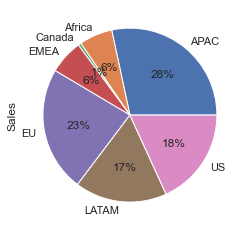

In [235]:
r='autocpt'
plt.plot(e=r, kind='pie')
explode=(0.05, 0.05, 0.05)
top_region.groupby(['Market']).sum().plot(kind='pie', y='Sales',autopct='%1.0f%%')

In [241]:
# Analaysing Sales percentage based on region using pie charges
top_region= df.groupby('Market')['Profit'].sum().sort_values(ascending=False)
top_region.reset_index()

,Market,Profit
0,APAC,436000.04900
1,EU,372829.74150
2,US,286397.02170
3,LATAM,221643.48708
4,Africa,88871.63100
5,EMEA,43897.97100
6,Canada,17817.39000


<AxesSubplot:ylabel='Profit'>

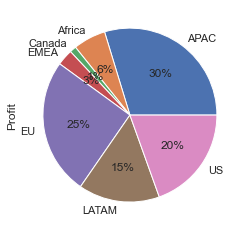

In [242]:
r='autocpt'
plt.plot(e=r, kind='pie')
explode=(0.05, 0.05, 0.05)
top_region.groupby(['Market']).sum().plot(kind='pie', y='Profit',autopct='%1.0f%%')

In [121]:
u=df.State[:10]

<AxesSubplot:xlabel='Quantity', ylabel='count'>

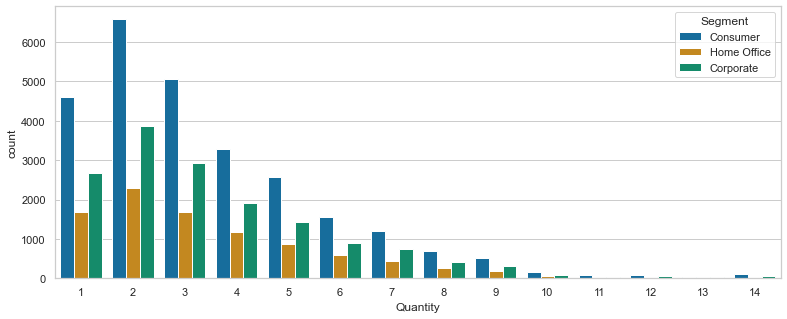

In [217]:
plt.figure(figsize=(13,5))
sns.countplot(x='Quantity',hue='Segment',palette='colorblind',data=df)

# Feature Engineering

In [ ]:
#introducing new columns to the dataset such as:
# unit price( sales?quantity)
# Month, year and intervals in days between order and shipping date.

In [7]:
# creating a new column for unit price
df['Unit']=df['Sales']/df['Quantity']

In [8]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit
0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150
1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122
2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530
3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955
4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734


In [9]:
# spliiting the datetime series to day, months and year seperately

df['Order_Day']=df['Order Date'].dt.day
df['Order_Month']=df['Order Date'].dt.month
df['Order_Year']=df['Order Date'].dt.year

df['Ship_Day']=df['Ship Date'].dt.day
df['Ship_Month']=df['Ship Date'].dt.month
df['Ship_Year']=df['Ship Date'].dt.year


In [10]:
# days interval betweeen order and shipping
df['Days_Intervals']=df['Order_Day']-df['Ship_Day']


In [11]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit,Order_Day,Order_Month,Order_Year,Ship_Day,Ship_Month,Ship_Year,Days_Intervals
0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,1,1,2011,1,6,2011,0
1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,1,1,2011,1,8,2011,0
2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,1,1,2011,1,5,2011,0
3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,1,1,2011,1,5,2011,0
4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,1,1,2011,1,8,2011,0


# EDA

<AxesSubplot:>

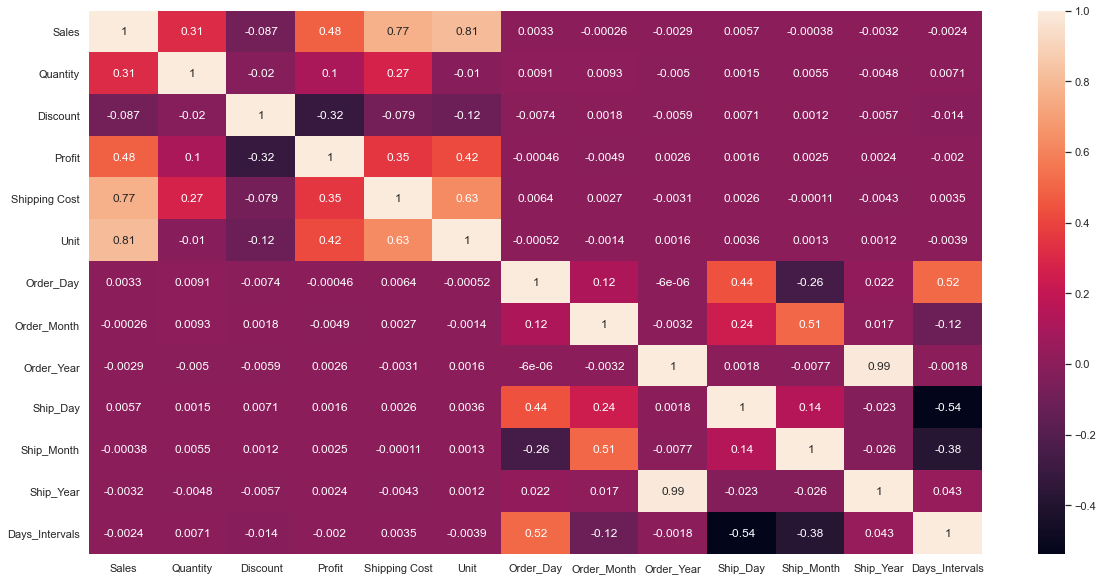

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)


# Summary of the HeatMap

Carefully studying the heatmap is shows that:
    1. Profit and Discount are Negative less correlated to each other.
    2. Shipping Cost and Sales are highly positvely correlated (i.e the higher the cost of shipping the higher the sales Price of the product)
    3. Profit and Sales are moderately correlated
    4. Ship year and ordr are highly correlated and also indicate one of the column needs to be drop and performing model.
    5. Unit and shipping cost are positively correlated.


# Data Analysis

In [ ]:
What is the sales and profit per market?

What is the most and least profitable market?

How are you going to increase the sales for the products that least bought?

What is the correlation between discount and sale?

# What is the sales and profit per market?

In [254]:
# SALES CATEGORY
Sales_category=pd.DataFrame(df.groupby(["Market"])[['Sales','Quantity']].sum().sort_values(['Sales','Quantity'],ascending=[False,False]))
Sales_category

,Sales,Quantity
Market,,
APAC,3.585744e+06,41226
EU,2.938089e+06,37773
US,2.297201e+06,37873
LATAM,2.164605e+06,38526
EMEA,8.061613e+05,11517
Africa,7.837732e+05,10564
Canada,6.692817e+04,833


In [ ]:
The sales Category clearly shows that APAC makes more sales of product in the market domain. WHILE
Cananda makes the least sales in the market domain.

In [255]:
# PROFIT CATEGORY
Profit_category=pd.DataFrame(df.groupby(["Market"])[['Profit','Quantity']].sum().sort_values(['Profit','Quantity'],ascending=[False,False]))
Profit_category

,Profit,Quantity
Market,,
APAC,436000.04900,41226
EU,372829.74150,37773
US,286397.02170,37873
LATAM,221643.48708,38526
Africa,88871.63100,10564
EMEA,43897.97100,11517
Canada,17817.39000,833


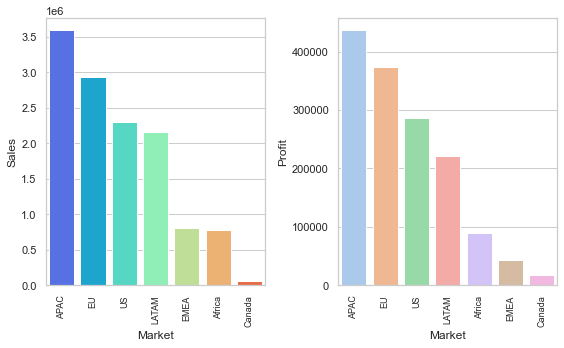

In [256]:
# GRaphic representation of sales and profit per market

sns.set_theme(style='whitegrid')
figure, axis=plt.subplots(1,2, figsize=(8,5))
cat1=sns.barplot(x=Sales_category.index,y=Sales_category.Sales, ax=axis[0], palette='rainbow')
cat2=sns.barplot(x=Profit_category.index,y=Profit_category.Profit, ax=axis[1], palette='pastel')
#cat3=sns.barplot(x=df1.index,y=df1.Quantity, ax=axis[2], palette='winter')

# rotate the x-axia
plt.setp(cat1.get_xticklabels(),rotation='vertical', size=9)
plt.setp(cat2.get_xticklabels(),rotation='vertical', size=9)
#plt.setp(cat3.get_xticklabels(),rotation='vertical', size=9)


figure.tight_layout()

# What is the most and least profitable market?

In [93]:
# PROFIT CATEGORY
Profit_category=pd.DataFrame(df.groupby(["Market"])[['Profit','Quantity']].sum().sort_values('Profit', ascending=False))
Profit_category

,Profit,Quantity
Market,,
APAC,436000.04900,41226
EU,372829.74150,37773
US,286397.02170,37873
LATAM,221643.48708,38526
Africa,88871.63100,10564
EMEA,43897.97100,11517
Canada,17817.39000,833


# How are you going to increase the sales for the products that least bought?


In [101]:
# checking the least sales of product using the groupby
Product_category=pd.DataFrame(df.groupby(["Category"])[['Sales']].sum().sort_values('Sales', ascending=False))
Product_category

,Sales
Category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


In [107]:
# comparing the unit of the product to determine why office supplies has the least sales
Unit=pd.DataFrame(df.groupby(["Category"])[['Unit']].sum().sort_values('Unit', ascending=False))
Unit

,Unit
Category,
Technology,1.377570e+06
Furniture,1.187896e+06
Office Supplies,1.109847e+06


# What is the correlation between discount and sale?

In [ ]:
""" From our heatmap it can be deduced that the correlation between Discount and Sales have little to no
linear correlation. This is indicative taht despise targeting to imp;ement discounts as promotional strategy
 to successfully increased sales, superstore encourage bad consumer psychology instead.
 And this can negatively affect superstore brand image in the long run."""

# Recommendation

In [ ]:
Superstore should come up with a better promotional strategy that will attract more consumers and increase their sales.

Superstore should chanel their focus on selling products that consumers are much interested in and gradually remove those
loss making product from their shelf for higher profitability

Areas for improvement includes addressing lower profit in certain region, optimizing discounts and exploring opporrtunities
for cost reuction.





In [18]:
df.sort_values(by=['Order Date', 'Ship Date'])

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit,Order_Day,Order_Month,Order_Year,Ship_Day,Ship_Month,Ship_Year,Days_Intervals
2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,1,1,2011,1,5,2011,0
3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,1,1,2011,1,5,2011,0
0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,1,1,2011,1,6,2011,0
1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,1,1,2011,1,8,2011,0
4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,1,1,2011,1,8,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51280,2014-12-31,2015-06-01,Standard Class,Home Office,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,Office Supplies,Labels,"Harbour Creations Removable Labels, Adjustable",49.500,6,0.0,6.840,2.15,Medium,8.250,31,12,2014,1,6,2015,30
51288,2014-12-31,2015-06-01,Standard Class,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.560,0.20,Medium,7.120,31,12,2014,1,6,2015,30
51247,2014-12-31,2015-07-01,Standard Class,Corporate,Shantou,Guangdong,China,APAC,North Asia,Technology,Accessories,"Enermax Numeric Keypad, Bluetooth",171.990,3,0.0,6.840,16.66,Medium,57.330,31,12,2014,1,7,2015,30
51270,2014-12-31,2015-07-01,Standard Class,Corporate,Shantou,Guangdong,China,APAC,North Asia,Office Supplies,Envelopes,"Ames Business Envelopes, Recycled",67.200,5,0.0,24.750,4.06,Medium,13.440,31,12,2014,1,7,2015,30


In [ ]:
# Exporting Dataframe to csv file

In [21]:
df.to_csv('Solution to Startup Project One(1).csv')